<a href="https://colab.research.google.com/github/martinvs87/Exchange-rates-Commodities/blob/main/Commodities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

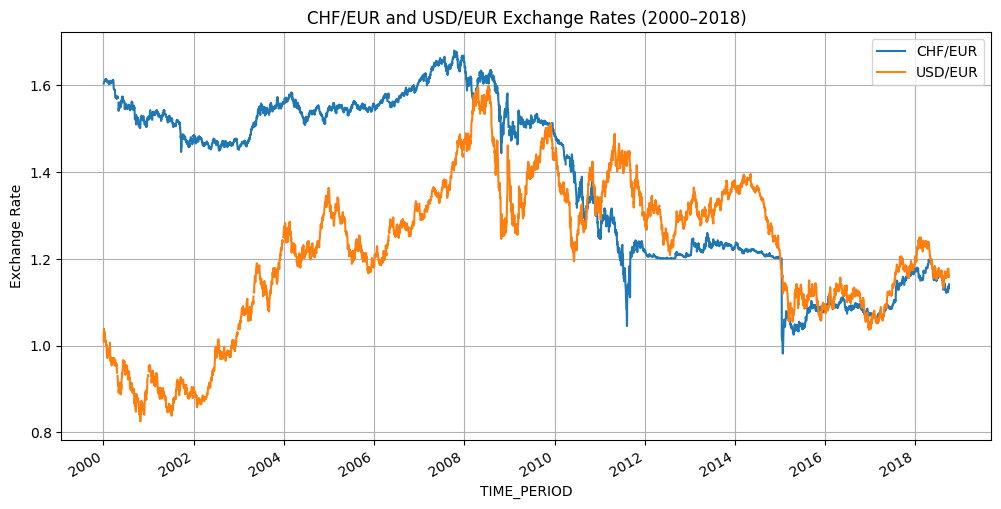

In [1]:
# -*- coding: utf-8 -*-
"""exchange_rates.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1q7cABib2HZtsr7ov9fXemlGihZ-u3uGw
"""

import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

# --- Common configuration ---
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/'
resource = 'data'
parameters = {
    'startPeriod': '2000-01-01',
    'endPeriod': '2018-10-01'
}

# --- Get CHF/EUR data ---
flowRef = 'EXR'
key_chf_eur = 'D.CHF.EUR.SP00.A'  # CHF per EUR (spot)
url_chf_eur = f"{entrypoint}{resource}/{flowRef}/{key_chf_eur}"
response_chf_eur = requests.get(url_chf_eur, params=parameters, headers={'Accept': 'text/csv'})
df_chf_eur = pd.read_csv(io.StringIO(response_chf_eur.text))
ts_chf_eur = df_chf_eur.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
ts_chf_eur.rename(columns={'OBS_VALUE': 'CHF/EUR'}, inplace=True)

# --- Get USD/EUR data ---
key_usd_eur = 'D.USD.EUR.SP00.A'  # USD per EUR (spot)
url_usd_eur = f"{entrypoint}{resource}/{flowRef}/{key_usd_eur}"
response_usd_eur = requests.get(url_usd_eur, params=parameters, headers={'Accept': 'text/csv'})
df_usd_eur = pd.read_csv(io.StringIO(response_usd_eur.text))
ts_usd_eur = df_usd_eur.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
ts_usd_eur.rename(columns={'OBS_VALUE': 'USD/EUR'}, inplace=True)

# --- Convert 'TIME_PERIOD' to datetime and set as index ---
ts_chf_eur['TIME_PERIOD'] = pd.to_datetime(ts_chf_eur['TIME_PERIOD'])
ts_usd_eur['TIME_PERIOD'] = pd.to_datetime(ts_usd_eur['TIME_PERIOD'])
ts_chf_eur.set_index('TIME_PERIOD', inplace=True)
ts_usd_eur.set_index('TIME_PERIOD', inplace=True)

# --- Merge the two series on their index ---
combined_ts = ts_chf_eur.join(ts_usd_eur, how='inner')

# --- Plotting ---
combined_ts.plot(title='CHF/EUR and USD/EUR Exchange Rates (2000–2018)', figsize=(12, 6))
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

--- Searching for oro ---
                                                    Grupo de serie  \
Código de serie                                                      
PN01527BM        Exportaciones de productos tradicionales (prec...   
PN38793BM        Exportaciones de productos tradicionales (prec...   

                                             Nombre de serie Frecuencia  \
Código de serie                                                           
PN01527BM        Mineros - Oro - Precio (US$ por onzas troy)    Mensual   
PN38793BM        Mineros - Oro - Precio (US$ por onzas troy)    Mensual   

                Fecha de inicio Fecha de fin  
Código de serie                               
PN01527BM              Ene-1985     Dic-2021  
PN38793BM              Ene-2012     Feb-2024  
--- Searching for cobre ---
                                                    Grupo de serie  \
Código de serie                                                      
PN01518BM        Exportaciones de pr

--- Searching for oro ---
                                                    Grupo de serie  \
Código de serie                                                      
PN01527BM        Exportaciones de productos tradicionales (prec...   
PN38793BM        Exportaciones de productos tradicionales (prec...   

                                             Nombre de serie Frecuencia  \
Código de serie                                                           
PN01527BM        Mineros - Oro - Precio (US$ por onzas troy)    Mensual   
PN38793BM        Mineros - Oro - Precio (US$ por onzas troy)    Mensual   

                Fecha de inicio Fecha de fin  
Código de serie                               
PN01527BM              Ene-1985     Dic-2021  
PN38793BM              Ene-2012     Feb-2024  
--- Searching for cobre ---
                                                    Grupo de serie  \
Código de serie                                                      
PN01518BM        Exportaciones de pr

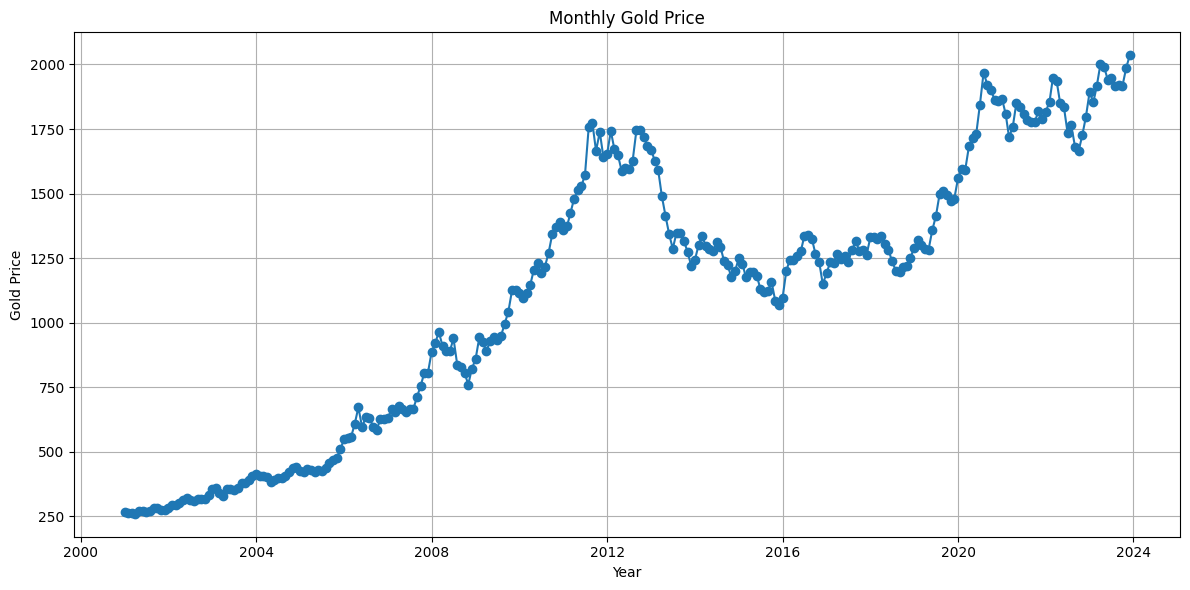

In [17]:
!pip install pandas matplotlib requests
!pip install econdata

import pandas as pd
import matplotlib.pyplot as plt
from econdata import BCRP


# Search for each commodity
for commodity in ['oro', 'cobre', 'zinc', 'maíz', 'trigo']:
    print(f"--- Searching for {commodity} ---")
    search = BCRP.search(consulta=[commodity], grupo=['Precios'], frecuencia='Mensual')
    print(search)


# SERIE GOLD
series_code = 'PN01654XM'

# Data from 2000-01 to 2023-01
df = BCRP.get_data(
    series={series_code: 'Gold'},
    fechaini='200001',
    fechafin='202301'
)

# Conversión de indice a serie de tiempo
df.index = pd.PeriodIndex(df.index, freq='M').to_timestamp()

# Gráfico Gold time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Gold'], marker='o', linestyle='-')
plt.title('Monthly Gold Price')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid(True)
plt.tight_layout()
plt.show()





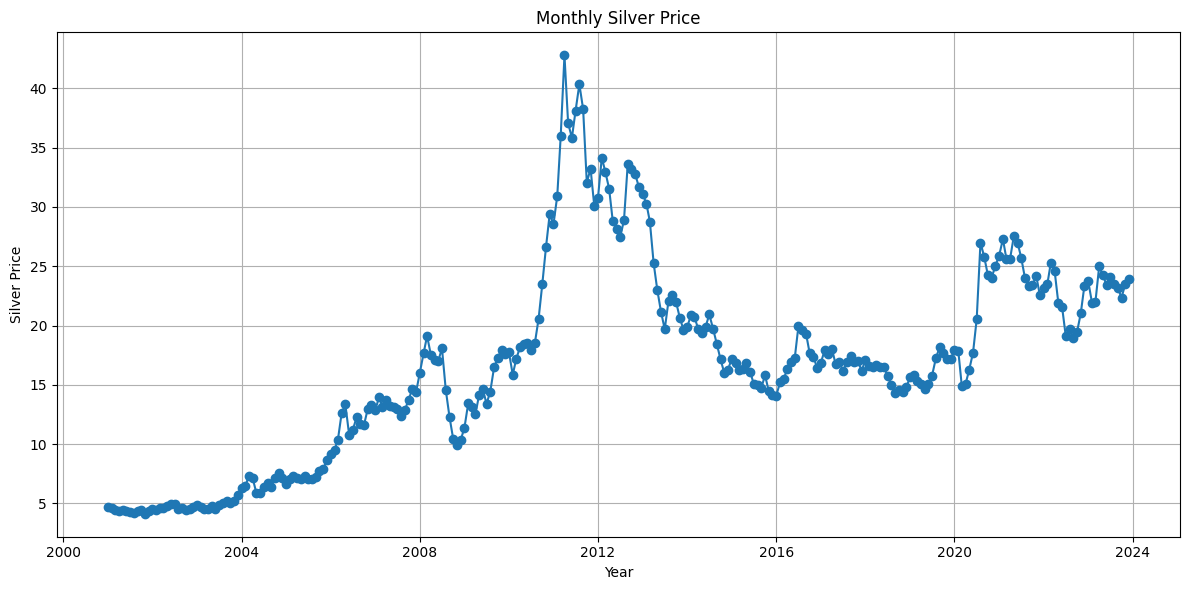

In [19]:
# SERIE SILVER
series_code = 'PN01655XM'

# Data from 2000-01 to 2023-01
df = BCRP.get_data(
    series={series_code: 'Silver'},
    fechaini='200001',
    fechafin='202301'
)

# Conversión de indice a serie de tiempo
df.index = pd.PeriodIndex(df.index, freq='M').to_timestamp()

# Gráfico Gold time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Silver'], marker='o', linestyle='-')
plt.title('Monthly Silver Price')
plt.xlabel('Year')
plt.ylabel('Silver Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# SERIE SILVER
series_code = 'PN01655XM'

# Data from 2000-01 to 2023-01
df = BCRP.get_data(
    series={series_code: 'Silver'},
    fechaini='200001',
    fechafin='202301'
)

# Conversión de indice a serie de tiempo
df.index = pd.PeriodIndex(df.index, freq='M').to_timestamp()

# Gráfico Gold time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Silver'], marker='o', linestyle='-')
plt.title('Monthly Silver Price')
plt.xlabel('Year')
plt.ylabel('Silver Price')
plt.grid(True)
plt.tight_layout()
plt.show()

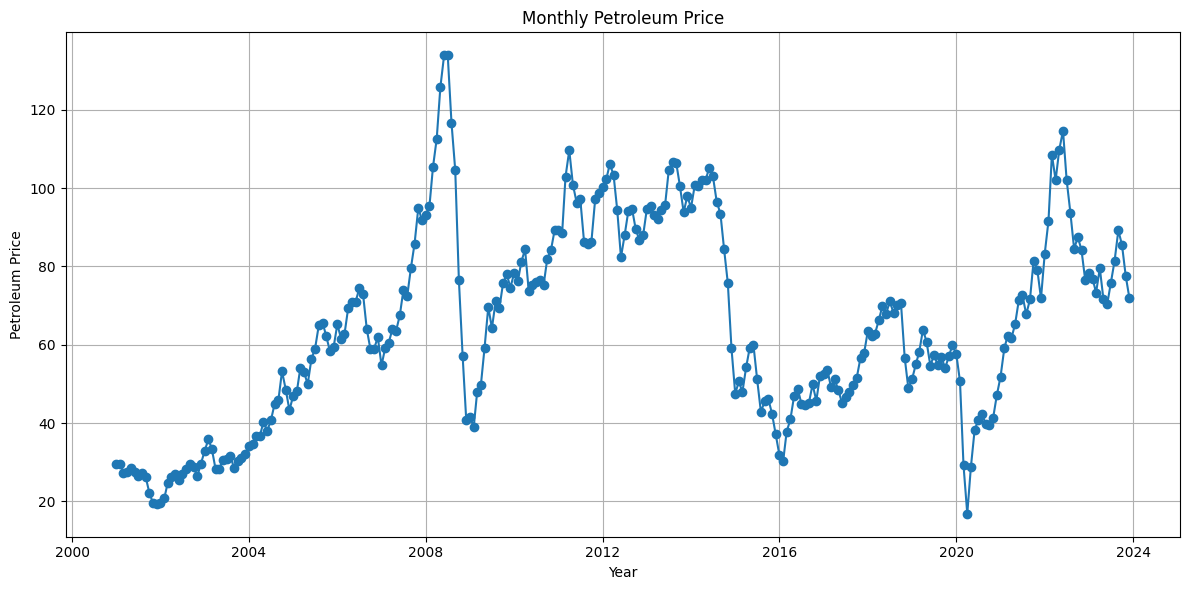

In [20]:


# SERIE PETROLEO
series_code = 'PN01660XM'

# Data from 2000-01 to 2023-01
df = BCRP.get_data(
    series={series_code: 'Petroleum'},
    fechaini='200001',
    fechafin='202301'
)

# Conversión de indice a serie de tiempo
df.index = pd.PeriodIndex(df.index, freq='M').to_timestamp()

# Gráfico Gold time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Petroleum'], marker='o', linestyle='-')
plt.title('Monthly Petroleum Price')
plt.xlabel('Year')
plt.ylabel('Petroleum Price')
plt.grid(True)
plt.tight_layout()
plt.show()